In [1]:
df_train <- read.csv(file = 'sources/train.csv')

In [ ]:
install.packages("dplyr")
library(dplyr)

In [ ]:
# Supprime la colonne Id du dataset
df_train <- select(df_train,-c(Id))

# Affiche la matrice de corrélation sur le dataset

In [2]:
install.packages("corrplot")
library("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded


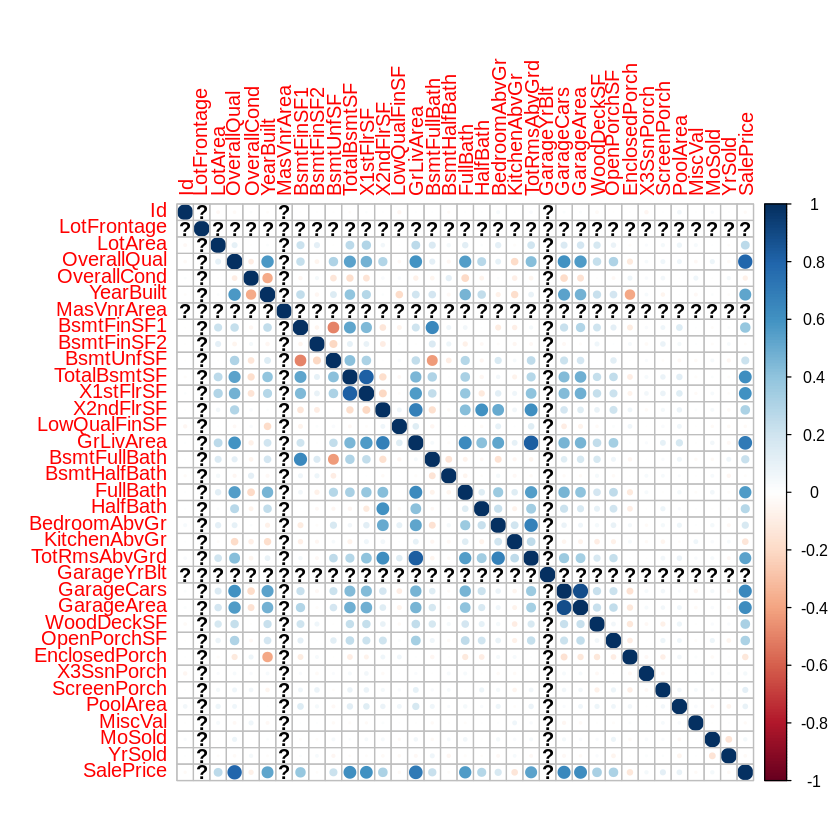

In [3]:
nums <- unlist(lapply(df_train, is.numeric))
df_train_nums <- df_train[,nums]
matcor <- cor(df_train_nums[,c(-2,-8,-25)])
corrplot(matcor)

# Affiche la correlation des features vs SalePrice

In [5]:
sale_corr <- matcor[,'SalePrice']
sorted_corr = sort(sale_corr, decreasing = TRUE)
sorted_corr

SalePrice   OverallQual     GrLivArea    GarageCars    GarageArea 
   1.00000000    0.79098160    0.70862448    0.64040920    0.62343144 
  TotalBsmtSF     X1stFlrSF      FullBath  TotRmsAbvGrd     YearBuilt 
   0.61358055    0.60585218    0.56066376    0.53372316    0.52289733 
   BsmtFinSF1    WoodDeckSF     X2ndFlrSF   OpenPorchSF      HalfBath 
   0.38641981    0.32441344    0.31933380    0.31585623    0.28410768 
      LotArea  BsmtFullBath     BsmtUnfSF  BedroomAbvGr   ScreenPorch 
   0.26384335    0.22712223    0.21447911    0.16821315    0.11144657 
     PoolArea        MoSold    X3SsnPorch    BsmtFinSF2  BsmtHalfBath 
   0.09240355    0.04643225    0.04458367   -0.01137812   -0.01684415 
      MiscVal            Id  LowQualFinSF        YrSold   OverallCond 
  -0.02118958   -0.02191672   -0.02560613   -0.02892259   -0.07785589 
EnclosedPorch  KitchenAbvGr 
  -0.12857796   -0.13590737

# Analyse en Composantes

In [ ]:
install.packages("FactoMineR")
install.packages('factoextra')

In [ ]:
library(FactoMineR)
library(factoextra)
res_pca<-PCA(df_train[,nums])
# res_pca$var$contrib

In [ ]:
fviz_pca_var(res_pca, col.var="contrib",
     gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
     repel = TRUE # Avoid text overlapping
)

In [ ]:
ggplot(df_train, aes(x=df_train$OverallQual, y=df_train$SalePrice)) + geom_boxplot()

In [17]:
top10 <- head(sorted_corr, 11)
top10

SalePrice  OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF 
   1.0000000    0.7909816    0.7086245    0.6404092    0.6234314    0.6135806 
   X1stFlrSF     FullBath TotRmsAbvGrd    YearBuilt   BsmtFinSF1 
   0.6058522    0.5606638    0.5337232    0.5228973    0.3864198

In [8]:
install.packages('psych')
library(psych)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in `[.data.frame`(df_train, , top10): object 'top10' not found


In [10]:
pairs.panels(df_train[,top10], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)

ERROR: Error in `[.data.frame`(df_train, , c(OverallQual)): object 'OverallQual' not found
